# Recap

- We test three different information structures.
    * Centralized learner
    * Distributed learner
    * Independent learner

- Under the Duo and Trio task settings.

## Findings

1. The policies induced by the information structures were **particular**.
    * Centralized agent approaches a landmark and than tries to approach another. Incurring in bumps.
    * Distributed agents do not seek to settle on a particular landmark but oscilate around landmarks.
    * Independent learners greedly seek to settle on a landmark. Regadless of bumps: High risk high reward.
2. Centralized agent needed more steps to propertly learn.
3. Determine the causes of distributed agent failing at learning on the latter parts of the episode.


# Duo Task

## Goal:

### Agents must learn how to navigate to a target landmark, while avoiding other agents.

- Both agents and landmarks are restarted at the begining of each episode. And agents are assigned a landmark they must navigate to, they must through trial and error be find which landmark they were assigned to.
- States are the coordinates to the other agent and to both landmarks.
- Reward is defined by the distance from an agent to its assigned landmark. If they collide both receive an extra reward=-1.


The objective of this notebook:
* Leaderboard: `episodes=5000` to `episodes=10000`.
* Test the new version of the distributed learners.
    - **Before**
    \begin{align*}
    \delta_t &\leftarrow \bar{r}_{t+1} - \mu_t + V(x(s_{t+1}); \omega_t) - V(x(s_t); \omega_t)\\
    \omega_{t+1} &\leftarrow \omega_t + \alpha  \delta_t x(s_t) 
    \end{align*}
    - **After**
    \begin{align*}
    \delta_t &\leftarrow \bar{r}_{t+1} - \mu_t + Q(x(s_{t+1}), a_{t+1} ; \omega_t) - Q(x(s_t), a_t; \omega_t)\\
    \omega^{a_t}_{t+1} &\leftarrow \omega^{a_t}_t + \alpha  \delta_t x(s_t) 
    \end{align*}
 
In summary the agent can now also learn from actions.

### General MDP

$$\mathcal{X} = \mathcal{X}_1 \times \mathcal{X}_2$$
$$\mathcal{A} = \mathcal{A}_1 \times \mathcal{A}_2$$
$$r = r_1(x_1) + r_2(x_2)$$

#### States

$$\mathcal{X}_1 = (\alpha^1_x, \alpha^1_y, v^ 1_x, v^ 1_y, l^1_x, l^1_y, l^2_x, l^2_y) $$
$$\mathcal{X}_2 = (\alpha^2_x, \alpha^2_y, v^2_x, v^2_y, l^1_x, l^1_y, l^2_x, l^2_y) $$

#### Actions

$$\mathcal{A}_1 = (0, 1, 2, 3, 4) $$
$$\mathcal{A}_2 = (0, 1, 2, 3, 4) $$

#### Rewards

 `TODO`

### Central Learner

The central agents solves the general MDP above.

    - Single agent.
    - Fully observable setting.
    - Learnings using the average reward from both players.
<table>
<tr>
<th>Central Agent</th>
</tr>
<tr>
<td>
$$\mathcal{X}_1 \times \mathcal{X}_2$$
$$\mathcal{A}_1 \times \mathcal{A}_2$$
$$r_1(x_1) + r_2(x_2)$$
</td>
</tr>
</table>

### Distributed Learners

The distributed agent have full observability but learn
independently.

    - Independent agents.
    - Fully observable setting.
    - Learnings using the average reward from both players.

<table>
<tr>
<th>Agent 1</th>
<th>Agent 2</th>
</tr>
<tr>
<td>
$$\mathcal{X}_1 \times \mathcal{X}_2$$
$$\mathcal{A}_1 $$
$$r_1(x_1) + r_2(x_2)$$
</td>
<td>
$$\mathcal{X}_1 \times \mathcal{X}_2$$
$$\mathcal{A}_2 $$
$$ r_1(x_1) + r_2(x_2)$$
</td>
</tr>
</table>

### Independent Learner

The distributed agent have partial observability and learn
independently.

    - Independent agents.
    - Partially observable setting.
    - Individual rewards.

<table>
<tr>
<th>Agent 1</th>
<th>Agent 2</th>
</tr>
<tr>
<td>
$$\mathcal{X}_1$$
$$\mathcal{A}_1$$
$$r_1(x_1)$$
</td>
<td>
$$\mathcal{X}_2$$
$$\mathcal{A}_2 $$
$$ r_2(x_2)$$
</td>
</tr>
</table>

## Settings


1. We compare the three information strucutures above. 
2. Initially, $\tau = 100$ and it falls linearly with the number of episodes (`explore_episodes=9975`). 
3. Each test dataframe consists of the DataFrame.describe() statistics from **N** = 30 independent random trials, each of which consisting of rollouts of `M=100`, with $\tau$ set to a predetermined value.

Parameters:
```
"""Configuration"""
ALPHA = 0.5  # ALPHA:
BETA = 0.3  # BETA:
TAU = 5.0   # Final TAU
ZETA = 0.1
EXPLORE_EPISODES = 9000
EPISODES = 10000
EXPLORE = True  # WHETER OR NOT WE USE EXPLORATION

SEED = 0
BASE_PATH = 'data/00_duo/01_tau05_10000/'

PIPELINE_SEEDS = [
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
    58,
    # 59,
    # 60,
    # 61,
    # 62,
    # 63,
    # 64,
    # 65,
    # 66,
    # 67,
    # 68,
    # 69,
    # 70,
    # 71,
    # 72,
    # 73,
    # 74,
    # 75,
    # 76
]
```

## Imports and Declarations

In [1]:
import pandas as pd

PREFIX_PATH = '02_duo_collisions_and_couplings/'
SUFFIX_PATH = '02/pipeline-rollouts-summary.csv'

def get_path(x):
    return '%s/%s/%s' % (PREFIX_PATH, x, SUFFIX_PATH)
def get_csv(x):
    return pd.read_csv(get_path(x), sep=',', index_col=0)

def describe(dataframe: pd.DataFrame, label: str) -> pd.DataFrame:
    """Describes the dataframe
    
    Parameters
    ----------
    dataframe: pd.DataFrame
        A dataframe with description N independent rollouts.
        Each consisting of M timesteps.
        Trials are in the columns and rows are statistics.
        The result of df.describe()
   
    Returns
    -------
    dataframe: pd.DataFrame
        A description of the average return.
    
    """
    df = dataframe.drop(['std', 'count', '25%', '50%', '75%'], axis=0)
    ts = df.T.describe()['mean']
    ts.name = label
    return ts.to_frame()

## A.1) Central Agent

BASE_PATH = '00_duo/01_tau05_10000/00_central/02'

### A.1.1 Rollout Simulation

GIF from the best performing training.

![pipeline-central-simulation](00_duo/01_tau05_10000/00_central/02/simulation-pipeline-best.gif)

### A.1.2 Rollout Graph


![pipeline-central-simulation](00_duo/01_tau05_10000/00_central/02/evaluation_rollout_n2_num06.png)

### A.1.3 Train<a name="A-1.3"></a> 



[comment]: <![pipeline-central-train-12](00_duo/01_tau05_10000/00_central/02/train_pipeline_m12.png)>
[comment]: <![rollout-central-train-12](00_duo/01_tau05_10000/00_central/02/train_rollout_m12.png)>
![pipeline-central-train-30](02_duo_collisions_and_couplings/00_central/02/train_pipeline_m30.png)
![rollout-central-train-30](02_duo_collisions_and_couplings/00_central/02/train_rollout_m30.png)

### A.1.4 Collision 

<AxesSubplot:title={'center':'Collisions per Episode'}, xlabel='episode'>

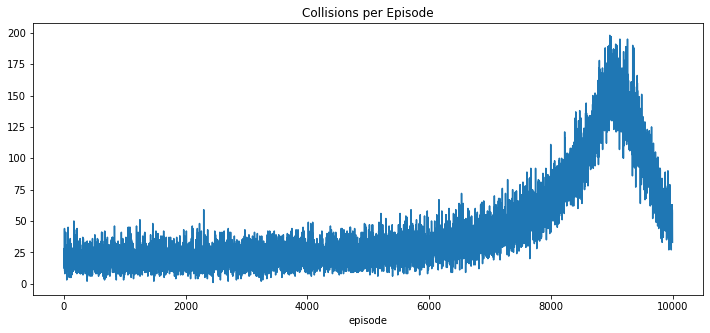

In [2]:
FIG_SIZE_LARGE = (12.0, 5.0)
FIG_SIZE_SMALL = (6.0, 4.0)
import pandas as pd
BASE_PATH = '02_duo_collisions_and_couplings/00_central/02'
df = pd.read_csv(BASE_PATH + '/pipeline-train-collisions.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'collisions'})
df = df.groupby(by='episode', axis=0)['collisions'].sum()
df.to_frame().loc[:, 'collisions'].plot(title='Collisions per Episode', figsize=FIG_SIZE_LARGE)


![pipeline-central-train-30](02_duo_collisions_and_couplings/00_central/02/train_pipeline_m30.png)

### A.1.5 Coupling

<AxesSubplot:title={'center':'Couplings per Episode'}, xlabel='episode'>

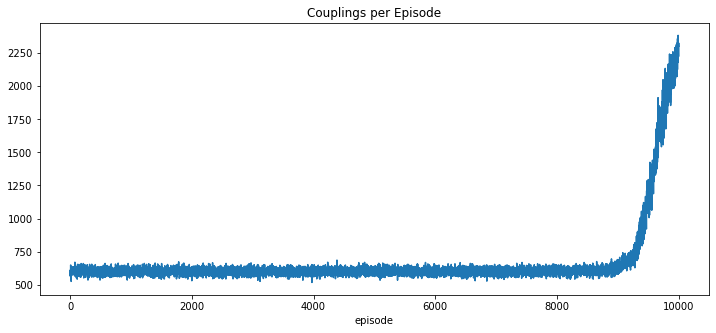

In [3]:
BASE_PATH = '02_duo_collisions_and_couplings/00_central/02'
df = pd.read_csv(BASE_PATH + '/pipeline-train-couplings.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'couplings'})
df = df.groupby(by='episode', axis=0)['couplings'].sum()
df.to_frame().loc[:, 'couplings'].plot(title='Couplings per Episode', figsize=FIG_SIZE_LARGE)

## A.2) Distributed Actor Critic

BASE_PATH = '00_duo/01_tau05_10000/02_distributed_learners/02'

### A.2.1 Rollouts

GIF from the best performing training.

![pipeline-distributed-simulation](00_duo/01_tau05_10000/01_distributed_learners2/02/simulation-pipeline-best.gif)

### A.2.2 Rollout Graph


![pipeline-distributed-simulation](00_duo/01_tau05_10000/01_distributed_learners2/02/evaluation_rollout_n2_num08.png)

### A.2.3 Train<a name="A-2.3"></a> 


[comment]: <![pipeline-central-train-12](00_duo/01_tau05_10000/01_distributed_learners2/02/train_pipeline_m12.png)>
[comment]: <![rollout-central-train-12](00_duo/01_tau05_10000/01_distributed_learners2/02/train_rollout_m12.png)>
![pipeline-central-train-30](02_duo_collisions_and_couplings/01_distributed_learners2/02/train_pipeline_m30.png)
![rollout-central-train-30](02_duo_collisions_and_couplings/01_distributed_learners2/02/train_rollout_m30.png)


### A.2.4 Collision 

<AxesSubplot:title={'center':'Collisions per Episode'}, xlabel='episode'>

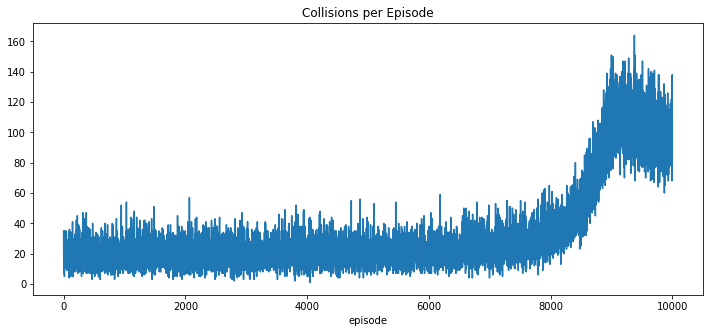

In [4]:
FIG_SIZE_LARGE = (12.0, 5.0)
FIG_SIZE_SMALL = (6.0, 4.0)
import pandas as pd
BASE_PATH = '02_duo_collisions_and_couplings/01_distributed_learners2/02'
df = pd.read_csv(BASE_PATH + '/pipeline-train-collisions.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'collisions'})
df = df.groupby(by='episode', axis=0)['collisions'].sum()
df.to_frame().loc[:, 'collisions'].plot(title='Collisions per Episode', figsize=FIG_SIZE_LARGE)

![pipeline-central-train-30](02_duo_collisions_and_couplings/01_distributed_learners2/02/train_pipeline_m30.png)

### A.2.5 Coupling

<AxesSubplot:title={'center':'Couplings per Episode'}, xlabel='episode'>

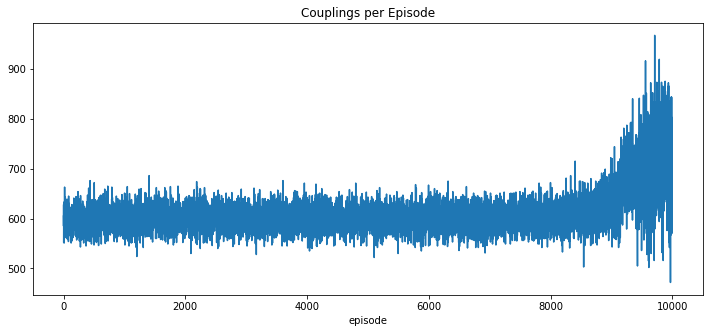

In [5]:
BASE_PATH = '02_duo_collisions_and_couplings/01_distributed_learners2/02'
df = pd.read_csv(BASE_PATH + '/pipeline-train-couplings.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'couplings'})
df = df.groupby(by='episode', axis=0)['couplings'].sum()
df.to_frame().loc[:, 'couplings'].plot(title='Couplings per Episode', figsize=FIG_SIZE_LARGE)

## A.3) Independent Learners Actor Critic

BASE_PATH = '00_duo/01_tau05_10000/03_independent_learners/02'

### A.3.1 Rollouts
GIF from the best performing training.

![pipeline-independent-simulation](00_duo/01_tau05_10000/02_independent_learners/02/simulation-pipeline-best.gif)

### A.3.2 Rollout Graph


![pipeline-independent-rollout](00_duo/01_tau05_10000/02_independent_learners/02/evaluation_rollout_n2_num05.png)

### A.3.3 Train <a name="A-3.3"></a> 


[comment]: <![pipeline-central-train-12]![pipeline-independent-train-12](00_duo/01_tau05_10000/02_independent_learners/02/train_pipeline_m12.png)>
[comment]: <![rollout-independent-train-12](00_duo/01_tau05_10000/02_independent_learners/02/train_rollout_m12.png)>
![pipeline-independent-train-30](02_duo_collisions_and_couplings/01_distributed_learners2/02/train_pipeline_m30.png)
![rollout-independent-train-30](02_duo_collisions_and_couplings/01_distributed_learners2/02/train_rollout_m30.png)

In [6]:
dataframes = []
dataframes.append(describe(get_csv('00_central'), label='Central A'))
dataframes.append(describe(get_csv('01_distributed_learners2'), label='Distributed A'))
dataframes.append(describe(get_csv('02_independent_learners'), label='Independent A'))
df = pd.concat(dataframes, axis=1)
df

,Central A,Distributed A,Independent A
count,30.000000,30.000000,30.000000
mean,-0.960336,-0.938566,-1.017834
std,0.175911,0.646418,0.134762
min,-1.525490,-4.123925,-1.266488
25%,-0.984575,-0.964362,-1.156921
50%,-0.927012,-0.811036,-0.997249
75%,-0.849754,-0.658842,-0.916338
max,-0.763453,-0.400658,-0.794330


# SECTION B: Settings



## B.1) Central Agent

BASE_PATH = '07_duo_collisions_and_couplings/00_central/02'

### B.1.1 Rollout Simulation

GIF from the best performing training.

![pipeline-central-simulation](07_duo_collisions_and_couplings/00_central/02/simulation-pipeline-best.gif)

### B.1.2 Rollout Graph


![pipeline-central-simulation](07_duo_collisions_and_couplings/00_central/02/evaluation_rollout_n2_num08.png)

### B.1.3 Train<a name="A-1.3"></a> 



![pipeline-central-train-30](07_duo_collisions_and_couplings/00_central/02/train_pipeline_m30.png)
![rollout-central-train-30](07_duo_collisions_and_couplings/00_central/02/train_rollout_m30.png)

### B.1.4 Collision 

<AxesSubplot:title={'center':'Collisions per Episode'}, xlabel='episode'>

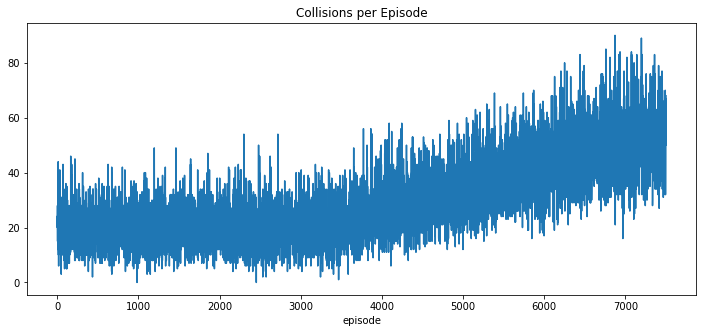

In [7]:
FIG_SIZE_LARGE = (12.0, 5.0)
FIG_SIZE_SMALL = (6.0, 4.0)
import pandas as pd
BASE_PATH = '07_duo_collisions_and_couplings/00_central/02'
df = pd.read_csv(BASE_PATH + '/pipeline-train-collisions.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'collisions'})
df = df.groupby(by='episode', axis=0)['collisions'].sum()
df.to_frame().loc[:, 'collisions'].plot(title='Collisions per Episode', figsize=FIG_SIZE_LARGE)

![pipeline-central-train-30](07_duo_collisions_and_couplings/00_central/02/train_pipeline_m30.png)

### B.1.5 Coupling

<AxesSubplot:title={'center':'Couplings per Episode'}, xlabel='episode'>

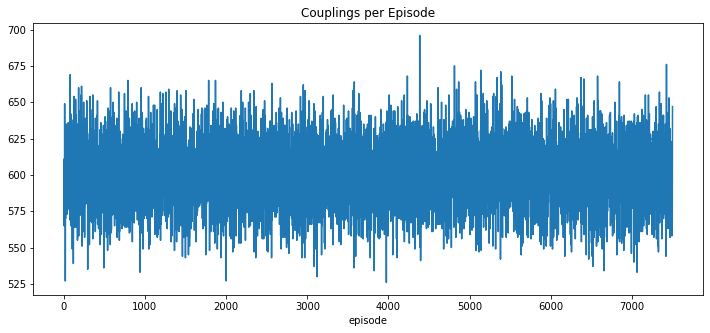

In [8]:
BASE_PATH = '07_duo_collisions_and_couplings/00_central/02'
df = pd.read_csv(BASE_PATH + '/pipeline-train-couplings.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'couplings'})
df = df.groupby(by='episode', axis=0)['couplings'].sum()
df.to_frame().loc[:, 'couplings'].plot(title='Couplings per Episode', figsize=FIG_SIZE_LARGE)

## B.2) Distributed Actor Critic

BASE_PATH = '07_duo_collisions_and_couplings/01_distributed_learners2/02'

### B.2.1 Rollouts

GIF from the best performing training.

![pipeline-distributed-simulation](07_duo_collisions_and_couplings/01_distributed_learners2/02/simulation-pipeline-best.gif)

### B.2.2 Rollout Graph


![pipeline-distributed-simulation](07_duo_collisions_and_couplings/01_distributed_learners2/02/evaluation_rollout_n2_num08.png)

### B.2.3 Train<a name="A-2.3"></a> 


[comment]: <![pipeline-central-train-12](00_duo/01_tau05_10000/01_distributed_learners2/02/train_pipeline_m12.png)>
[comment]: <![rollout-central-train-12](00_duo/01_tau05_10000/01_distributed_learners2/02/train_rollout_m12.png)>
![pipeline-central-train-30](02_duo_collisions_and_couplings/01_distributed_learners2/02/train_pipeline_m30.png)
![rollout-central-train-30](02_duo_collisions_and_couplings/01_distributed_learners2/02/train_rollout_m30.png)


### B.2.4 Collision 

<AxesSubplot:title={'center':'Collisions per Episode'}, xlabel='episode'>

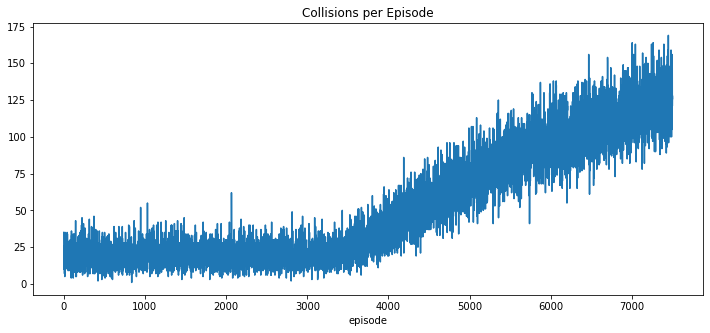

In [9]:
FIG_SIZE_LARGE = (12.0, 5.0)
FIG_SIZE_SMALL = (6.0, 4.0)
import pandas as pd
BASE_PATH = '07_duo_collisions_and_couplings/01_distributed_learners2/02'
df = pd.read_csv(BASE_PATH + '/pipeline-train-collisions.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'collisions'})
df = df.groupby(by='episode', axis=0)['collisions'].sum()
df.to_frame().loc[:, 'collisions'].plot(title='Collisions per Episode', figsize=FIG_SIZE_LARGE)

![pipeline-central-train-30](07_duo_collisions_and_couplings/01_distributed_learners2/02/train_pipeline_m30.png)

### B.1.5 Coupling

<AxesSubplot:title={'center':'Couplings per Episode'}, xlabel='episode'>

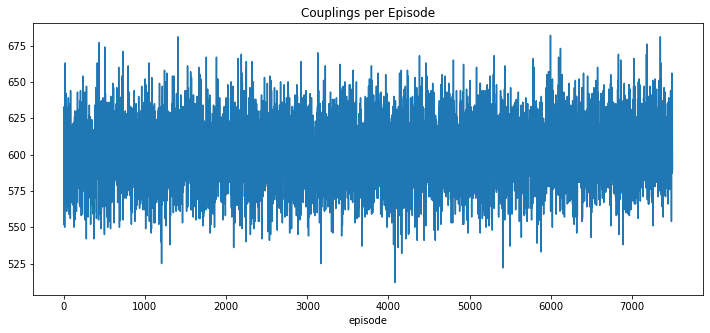

In [10]:
BASE_PATH = '07_duo_collisions_and_couplings/01_distributed_learners2/02'
df = pd.read_csv(BASE_PATH + '/pipeline-train-couplings.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'couplings'})
df = df.groupby(by='episode', axis=0)['couplings'].sum()
df.to_frame().loc[:, 'couplings'].plot(title='Couplings per Episode', figsize=FIG_SIZE_LARGE)

## B.3) Independent Learners Actor Critic

BASE_PATH = '07_duo_collisions_and_couplings/02_independent_learners/02'

### 2.1 Rollouts
GIF from the best performing training.

![pipeline-independent-simulation](07_duo_collisions_and_couplings/02_independent_learners/02/simulation-pipeline-best.gif)

### B.3.2 Rollout Graph


![pipeline-independent-rollout](07_duo_collisions_and_couplings/02_independent_learners/02/evaluation_rollout_n2_num05.png)

### B.3.3 Train <a name="B-3.3"></a> 


[comment]: <![pipeline-central-train-12]![pipeline-independent-train-12](00_duo/01_tau05_10000/02_independent_learners/02/train_pipeline_m12.png)>
[comment]: <![rollout-independent-train-12](00_duo/01_tau05_10000/02_independent_learners/02/train_rollout_m12.png)>
![pipeline-independent-train-30](07_duo_collisions_and_couplings/02_independent_learners/02/train_pipeline_m30.png)
![rollout-independent-train-30](07_duo_collisions_and_couplings/02_independent_learners/02/train_rollout_m30.png)

### B.3.4 Collision 

<AxesSubplot:title={'center':'Collisions per Episode'}, xlabel='episode'>

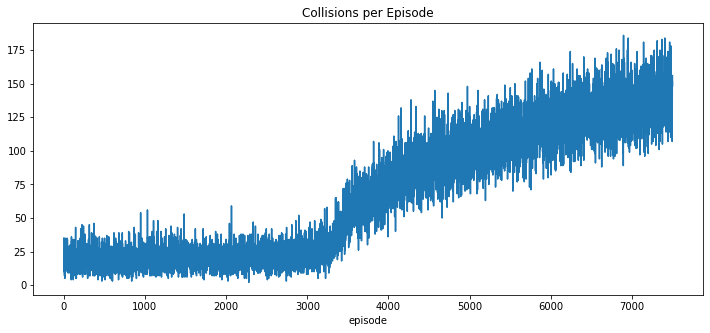

In [11]:
FIG_SIZE_LARGE = (12.0, 5.0)
FIG_SIZE_SMALL = (6.0, 4.0)
import pandas as pd
BASE_PATH = '07_duo_collisions_and_couplings/02_independent_learners/02'
df = pd.read_csv(BASE_PATH + '/pipeline-train-collisions.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'collisions'})
df = df.groupby(by='episode', axis=0)['collisions'].sum()
df.to_frame().loc[:, 'collisions'].plot(title='Collisions per Episode', figsize=FIG_SIZE_LARGE)

![pipeline-central-train-30](07_duo_collisions_and_couplings/02_independent_learners/02/train_pipeline_m30.png)

### B.3.5 Coupling

<AxesSubplot:title={'center':'Couplings per Episode'}, xlabel='episode'>

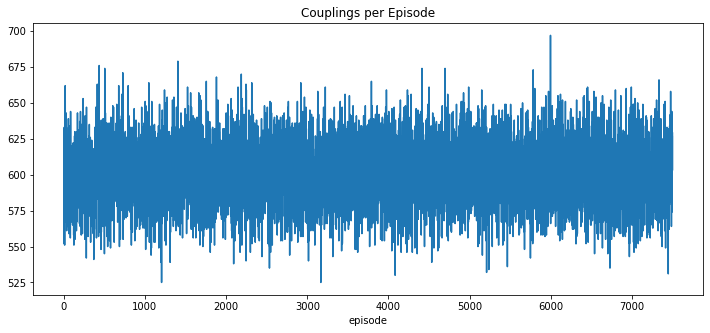

In [12]:
BASE_PATH = '07_duo_collisions_and_couplings/02_independent_learners/02'
df = pd.read_csv(BASE_PATH + '/pipeline-train-couplings.csv', sep=',', index_col=0)
df['episode'] = df.index // 100
df = df.set_index('episode', inplace=False, drop=True)
df = df.sum(axis=1).to_frame().rename(columns={0: 'couplings'})
df = df.groupby(by='episode', axis=0)['couplings'].sum()
df.to_frame().loc[:, 'couplings'].plot(title='Couplings per Episode', figsize=FIG_SIZE_LARGE)

## B.4) Leaderboard<a name="B-leaderboard"></a> 

In [13]:
PREFIX_PATH = '07_duo_collisions_and_couplings/'
SUFFIX_PATH = '02/pipeline-rollouts-summary.csv'

def get_path(x):
    return '%s/%s/%s' % (PREFIX_PATH, x, SUFFIX_PATH)
def get_csv(x):
    return pd.read_csv(get_path(x), sep=',', index_col=0)

dataframes = []
dataframes.append(describe(get_csv('00_central'), label='Central B'))
dataframes.append(describe(get_csv('01_distributed_learners2'), label='Distributed B'))
dataframes.append(describe(get_csv('02_independent_learners'), label='Independent B'))
df = pd.concat(dataframes, axis=1)
df

,Central B,Distributed B,Independent B
count,30.000000,30.000000,30.000000
mean,-0.978154,-0.698857,-0.716713
std,0.213612,0.170750,0.223650
min,-1.463456,-1.215567,-1.416009
25%,-1.120304,-0.786748,-0.816659
50%,-0.925293,-0.678755,-0.638874
75%,-0.812643,-0.586030,-0.563350
max,-0.693719,-0.462708,-0.445075


In [14]:
PREFIX_PATH = '02_duo_collisions_and_couplings/'
SUFFIX_PATH = '02/pipeline-rollouts-summary.csv'

def get_path(x):
    return '%s/%s/%s' % (PREFIX_PATH, x, SUFFIX_PATH)
def get_csv(x):
    return pd.read_csv(get_path(x), sep=',', index_col=0)

dataframes = []
dataframes.append(describe(get_csv('00_central'), label='Central A'))
dataframes.append(describe(get_csv('01_distributed_learners2'), label='Distributed A'))
dataframes.append(describe(get_csv('02_independent_learners'), label='Independent A'))
df = pd.concat(dataframes, axis=1)
df


,Central A,Distributed A,Independent A
count,30.000000,30.000000,30.000000
mean,-0.960336,-0.938566,-1.017834
std,0.175911,0.646418,0.134762
min,-1.525490,-4.123925,-1.266488
25%,-0.984575,-0.964362,-1.156921
50%,-0.927012,-0.811036,-0.997249
75%,-0.849754,-0.658842,-0.916338
max,-0.763453,-0.400658,-0.794330
